# Importando base de dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('dados/tips.csv')

In [4]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


# Traduzindo o conteúdo

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
5,25.29,4.71,Não,Sun,Dinner,4
6,8.77,2.00,Não,Sun,Dinner,2
7,26.88,3.12,Não,Sun,Dinner,4
8,15.04,1.96,Não,Sun,Dinner,2
9,14.78,3.23,Não,Sun,Dinner,2


In [14]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sabado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [16]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [17]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [18]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [19]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [20]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [21]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [22]:
import seaborn as sns

In [23]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\python310\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [24]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

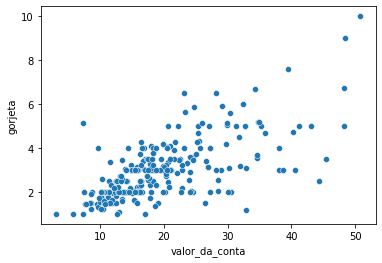

In [25]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

#### Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [26]:
print('A base de dados contém {} registros\n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [28]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
5,25.29,4.71,Não,Domingo,Jantar,4
6,8.77,2.00,Não,Domingo,Jantar,2
7,26.88,3.12,Não,Domingo,Jantar,4
8,15.04,1.96,Não,Domingo,Jantar,2
9,14.78,3.23,Não,Domingo,Jantar,2


In [34]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [35]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
5,25.29,4.71,Não,Domingo,Jantar,4,0.19
6,8.77,2.00,Não,Domingo,Jantar,2,0.23
7,26.88,3.12,Não,Domingo,Jantar,4,0.12
8,15.04,1.96,Não,Domingo,Jantar,2,0.13
9,14.78,3.23,Não,Domingo,Jantar,2,0.22


In [39]:
gorjetas.pocentagem = gorjetas.porcentagem.round(2)

In [40]:
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
105,15.36,1.64,Sim,Sabado,Jantar,2,0.11
199,13.51,2.00,Sim,Quinta,Almoço,2,0.15
163,13.81,2.00,Não,Domingo,Jantar,2,0.14
90,28.97,3.00,Sim,Sexta,Jantar,2,0.10
186,20.90,3.50,Sim,Domingo,Jantar,3,0.17
10,10.27,1.71,Não,Domingo,Jantar,2,0.17
26,13.37,2.00,Não,Sabado,Jantar,2,0.15
119,24.08,2.92,Não,Quinta,Almoço,4,0.12
109,14.31,4.00,Sim,Sabado,Jantar,2,0.28
122,14.26,2.50,Não,Quinta,Almoço,2,0.18


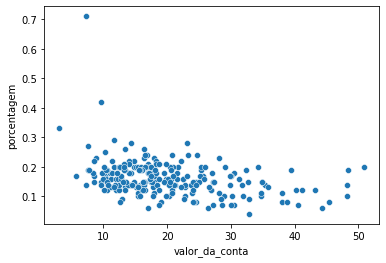

In [41]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

#### *Visualmente o valor da conta não é proporcional ao valor da gorjeta*

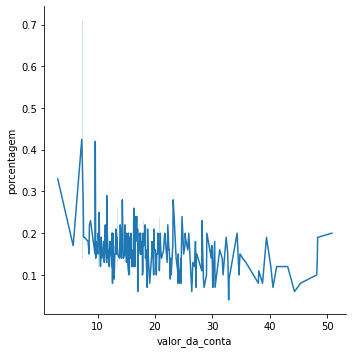

In [43]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind='line', data = gorjetas)

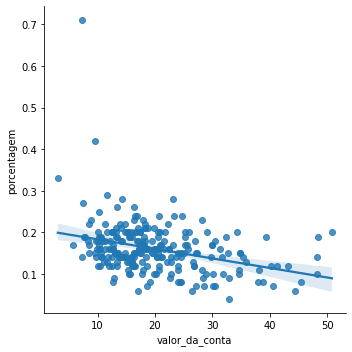

In [44]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

# Algumas formatações de gráficos

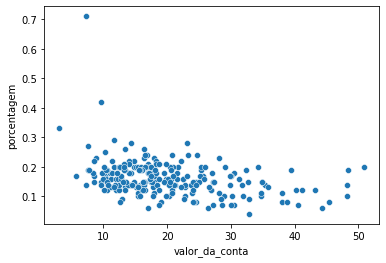

In [50]:
porcentagem_conta.get_figure() #Ver o gráfico novamente

In [53]:
porcentagem_conta.figure.suptitle('Valor da conta X Porcentagem') #Definindo um subtitulo

Text(0.5, 0.98, 'Valor da conta X Porcentagem')

In [54]:
porcentagem_conta.set_title('Análise do valor da conta em função da porcentagem de gorjetas') #Definindo um título

Text(0.5, 1.0, 'Análise do valor da conta em função da porcentagem de gorjetas')

In [55]:
porcentagem_conta.set(xlabel = 'Valor da conta', ylabel = 'Porcentagem de gorjetas')

[Text(0.5, 18.106250000000003, 'Valor da conta'),
 Text(17.200000000000003, 0.5, 'Porcentagem de gorjetas')]

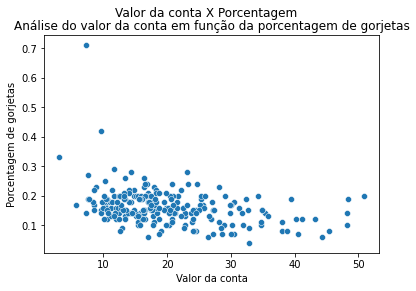

In [56]:
porcentagem_conta.get_figure() #Visualizar gráfico novamente após as alterações

In [58]:
porcentagem_conta.get_figure().savefig('imagem.png') #Salvando uma imagem do gráfico

# Análise 2 - Sobremesa

In [59]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [61]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [62]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


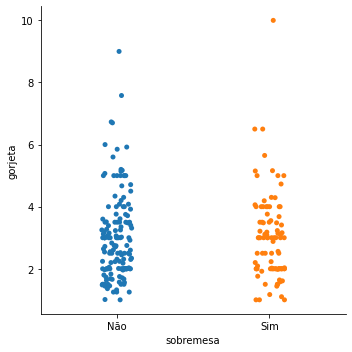

In [64]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

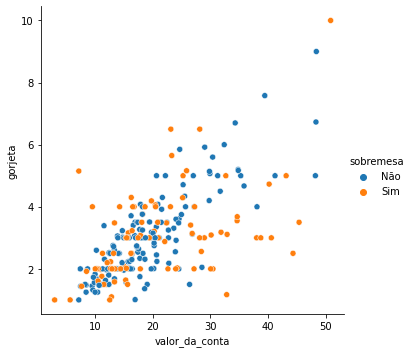

In [65]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

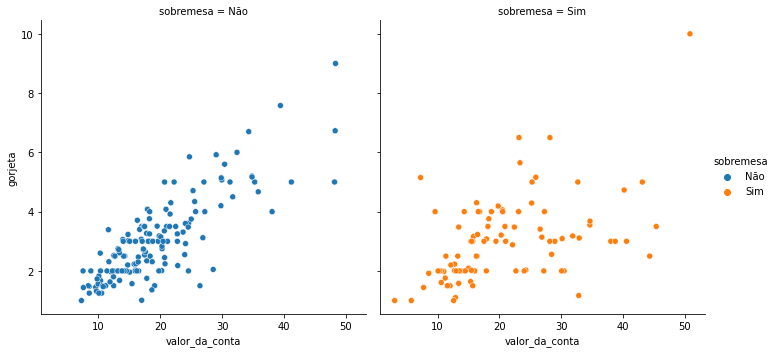

In [66]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa',data = gorjetas)

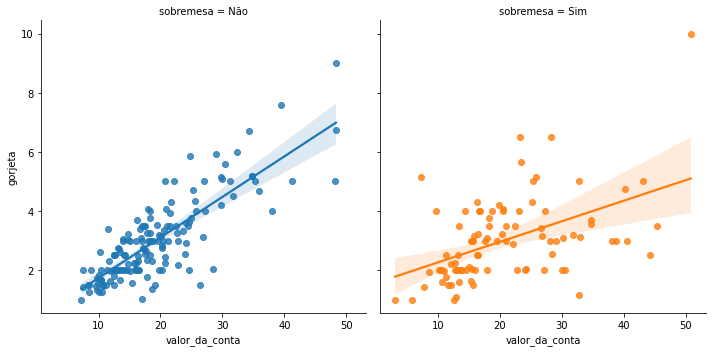

In [68]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

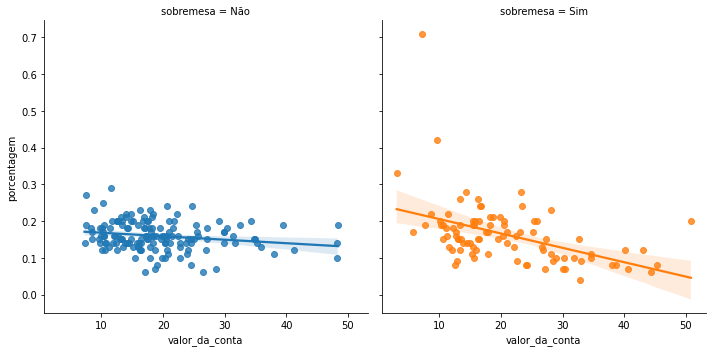

In [69]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

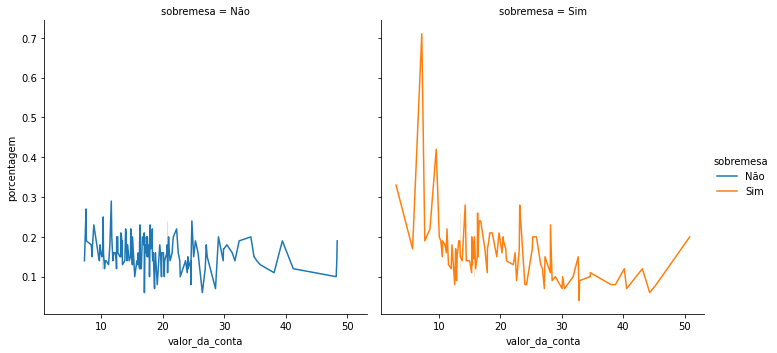

In [72]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

#### *Visualmente existe uma diferença no valor da gorjetas dos que pediram sobremesa para aqueles que não pediram*

## Teste de hipótese

**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [73]:
from scipy.stats import ranksums

In [77]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [78]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [80]:
r = ranksums(sobremesa, sem_sobremesa)

In [81]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

O p-value representa a probabilidade da amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade. No nosso caso podemos desconsiderar a hipótese alternativa pois o p-value foi maior que 0,5

# Análise 3 - Dia da semana

In [82]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [84]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

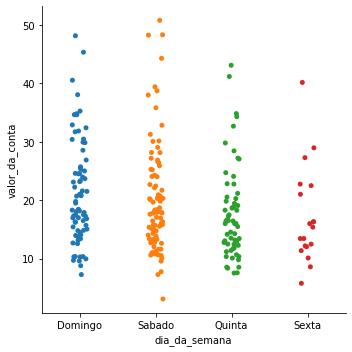

In [85]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

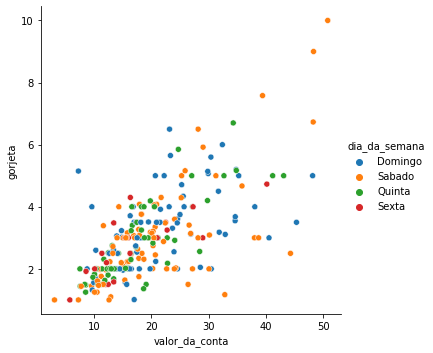

In [90]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

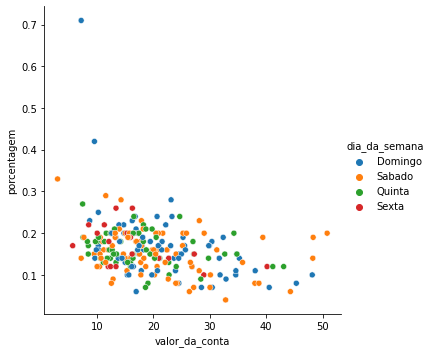

In [91]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

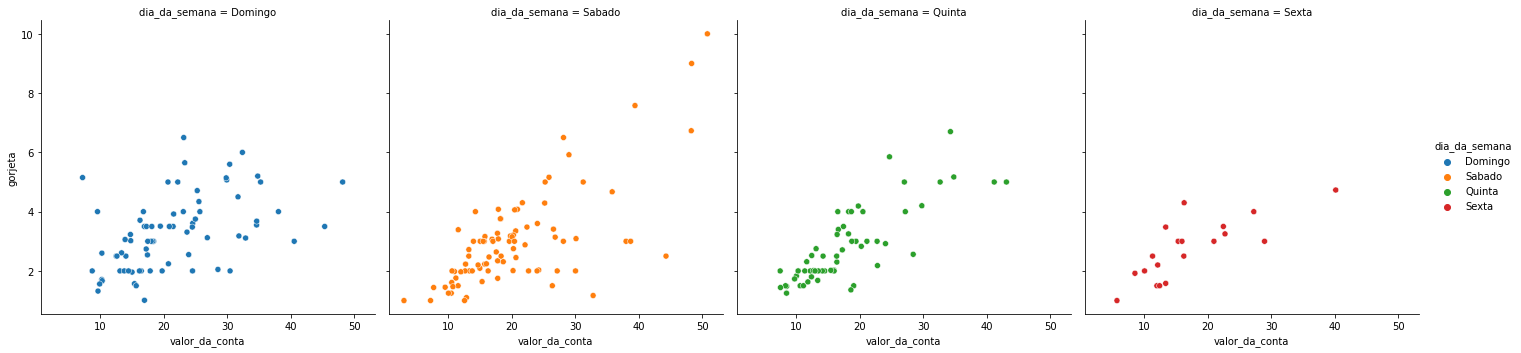

In [92]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

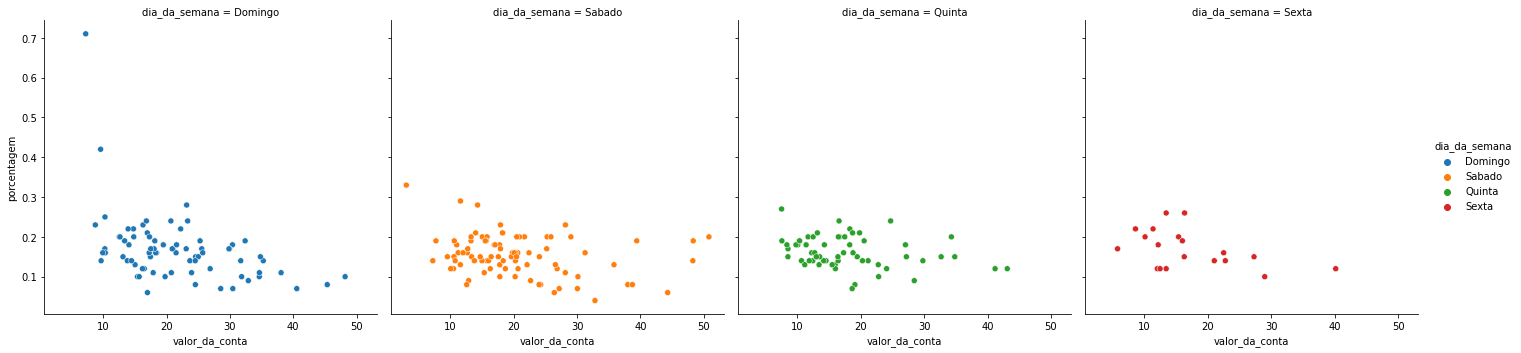

In [93]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

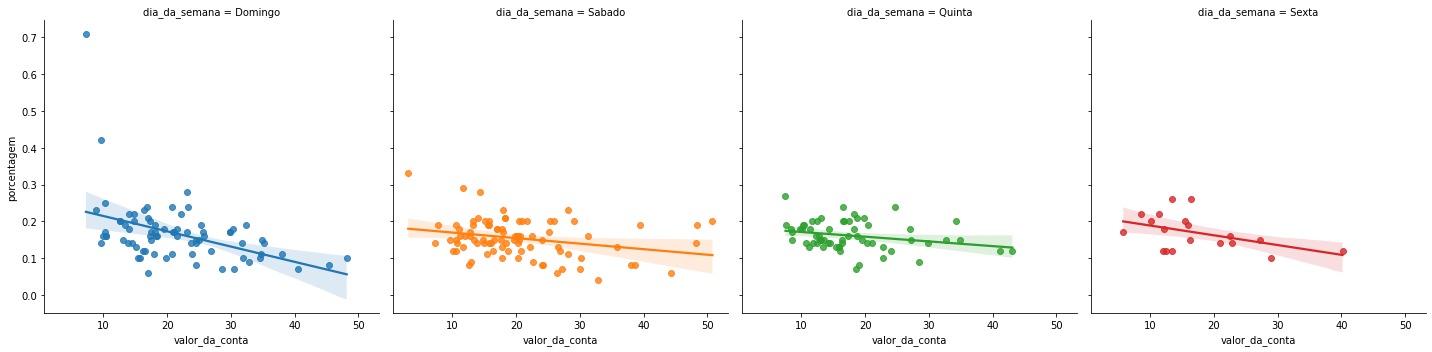

In [94]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [96]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [97]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [99]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [102]:
print('Frequência dos dias:')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no sábado e no domingo**

In [105]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [106]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [110]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**